# Telecom Customer Churn Prediction

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Source
https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### There is class imbalance for target variable, which needs to be balanced before running ML algorithms for classification.

In [9]:
df[df.isin([' '])].stack()

488   TotalCharges     
753   TotalCharges     
936   TotalCharges     
1082  TotalCharges     
1340  TotalCharges     
3331  TotalCharges     
3826  TotalCharges     
4380  TotalCharges     
5218  TotalCharges     
6670  TotalCharges     
6754  TotalCharges     
dtype: object

In [10]:
df.loc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### These are new customers which are less than one month old as Churn is No and monthly charges are present, but being new their Total Charges are not generated so they will be replaced by Zero.

In [11]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df['TotalCharges']=df['TotalCharges'].replace(to_replace=' ', value='0')

In [13]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [14]:
df['ratio']=df['TotalCharges']/df['MonthlyCharges']

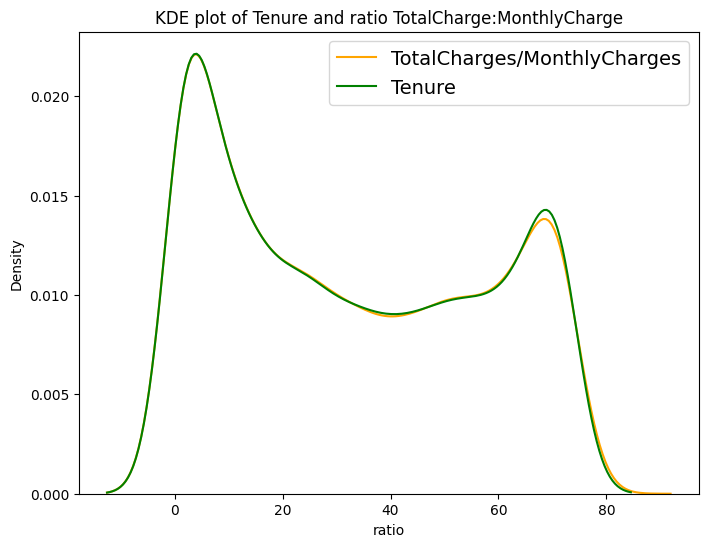

In [15]:
#Comparing Tenure and ratio of TotalCharges to Monthly Charges
plt.figure(figsize=(8,6))
sns.kdeplot(df['ratio'], color='orange', label='TotalCharges/MonthlyCharges')
sns.kdeplot(df['tenure'], color='green', label='Tenure')
plt.title('KDE plot of Tenure and ratio TotalCharge:MonthlyCharge')
plt.legend(loc='upper right', fontsize=14)
plt.show()

#### We observed that Tenure * Monthly Charges ≈ Total Charges or in other words Tenure ≈  Total Charges / Monthly Charges.

## About Numerical Features

#### Lets see Churn w.r.t. Numerical features Tenure, Monthly Charges and Total Charges.

#### Churn w.r.t. Tenure

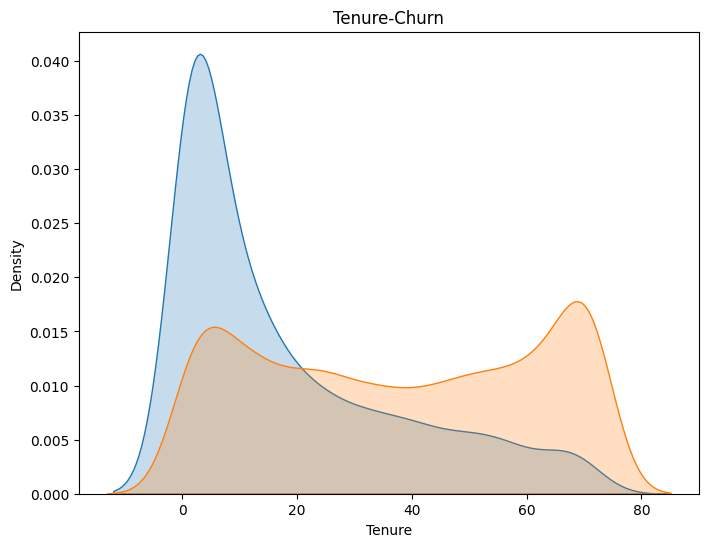

In [16]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.tenure[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.tenure[df.Churn=='No'], label='No Churn', shade=True)
plt.title('Tenure-Churn')
plt.xlabel('Tenure');

#### Observation 1: More Churn is observed in customers with less Tenure, i.e. recent customers are more likely to Churn.

#### Churn w.r.t. Monthly Charges

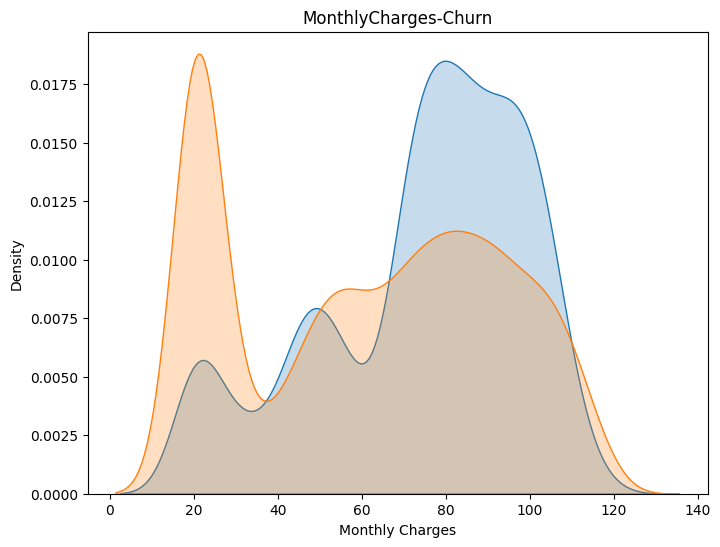

In [17]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.MonthlyCharges[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.MonthlyCharges[df.Churn=='No'], label='No Churn', shade=True)
plt.title('MonthlyCharges-Churn')
plt.xlabel('Monthly Charges');

#### Observation 2: More Churn is observed in customers with High Monthly charges. Also, as there is substantial increase in Monthly charges there is significant Churn of customers.

#### Churn w.r.t. Total Charges

Text(0.5, 1.0, 'TotalCharges-Churn')

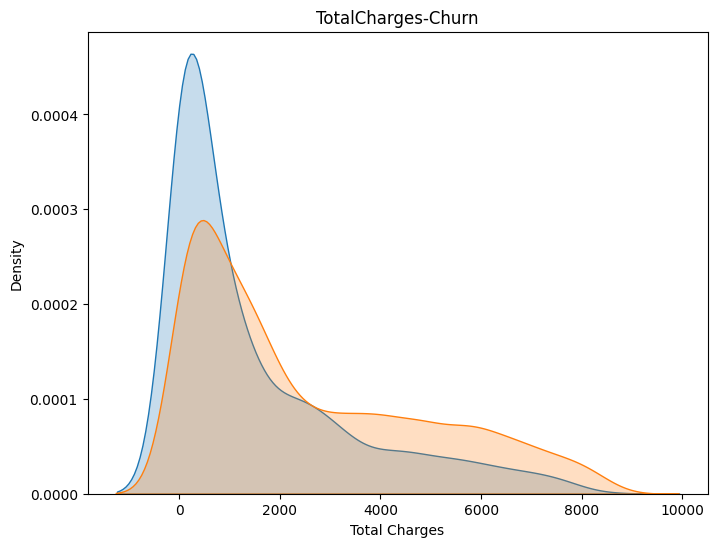

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.TotalCharges[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.TotalCharges[df.Churn=='No'], label='No Churn', shade=True)
plt.xlabel('Total Charges');
plt.title('TotalCharges-Churn')

#### Observation 3: Clients with High Total Charges are most likely to Churn. Majority Churn happens when Total Charges are in a certain band, as Total Charges increase further Churn rate is low as the only customers left are more likely to pay for services and stay with service provider.

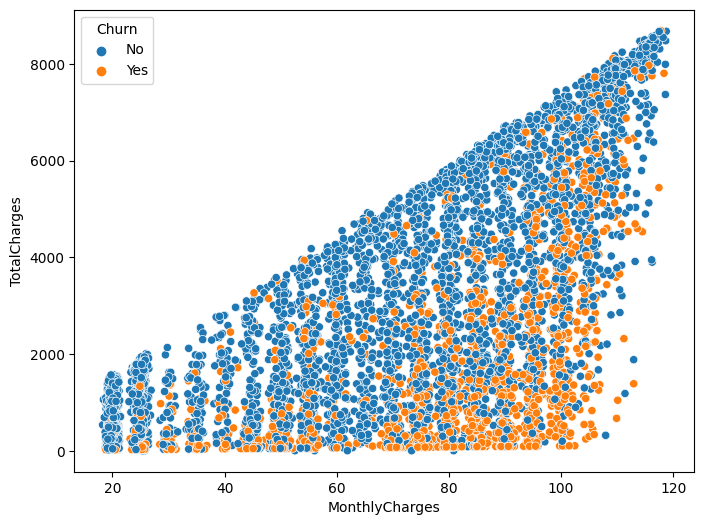

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df);

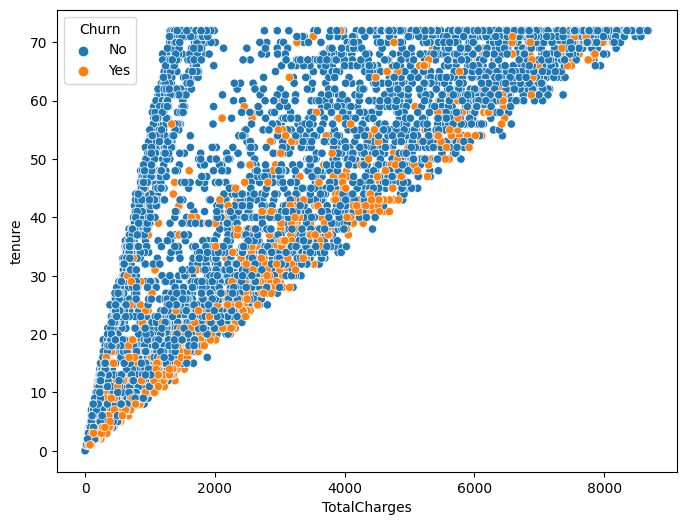

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df);

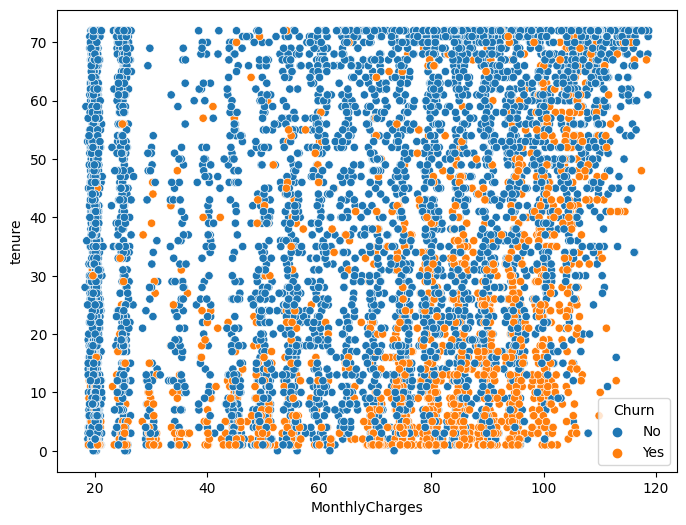

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df);

## About Categorical Features

#### Churn w.r.t. Gender

<Axes: xlabel='gender', ylabel='count'>

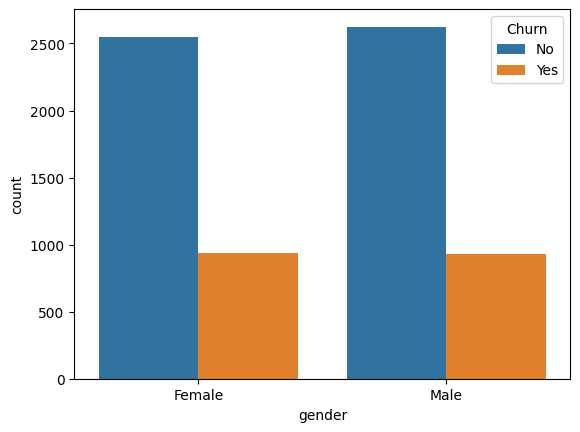

In [22]:
sns.countplot(x='gender', hue='Churn', data=df)

#### Gender doesn't seem to be specific for Churn.

#### Churn w.r.t Seniority

<Axes: xlabel='SeniorCitizen', ylabel='count'>

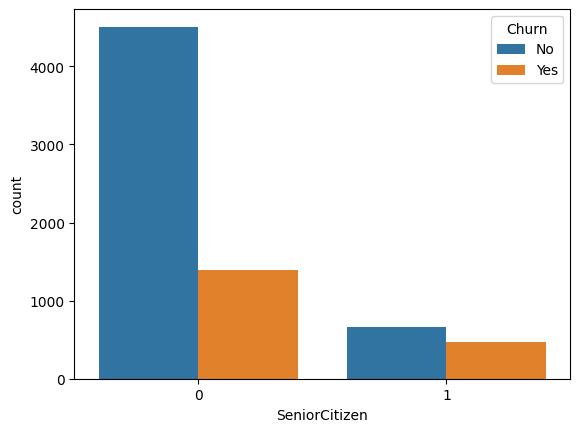

In [23]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

## Study Churn w.r.t. various other services

In [24]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

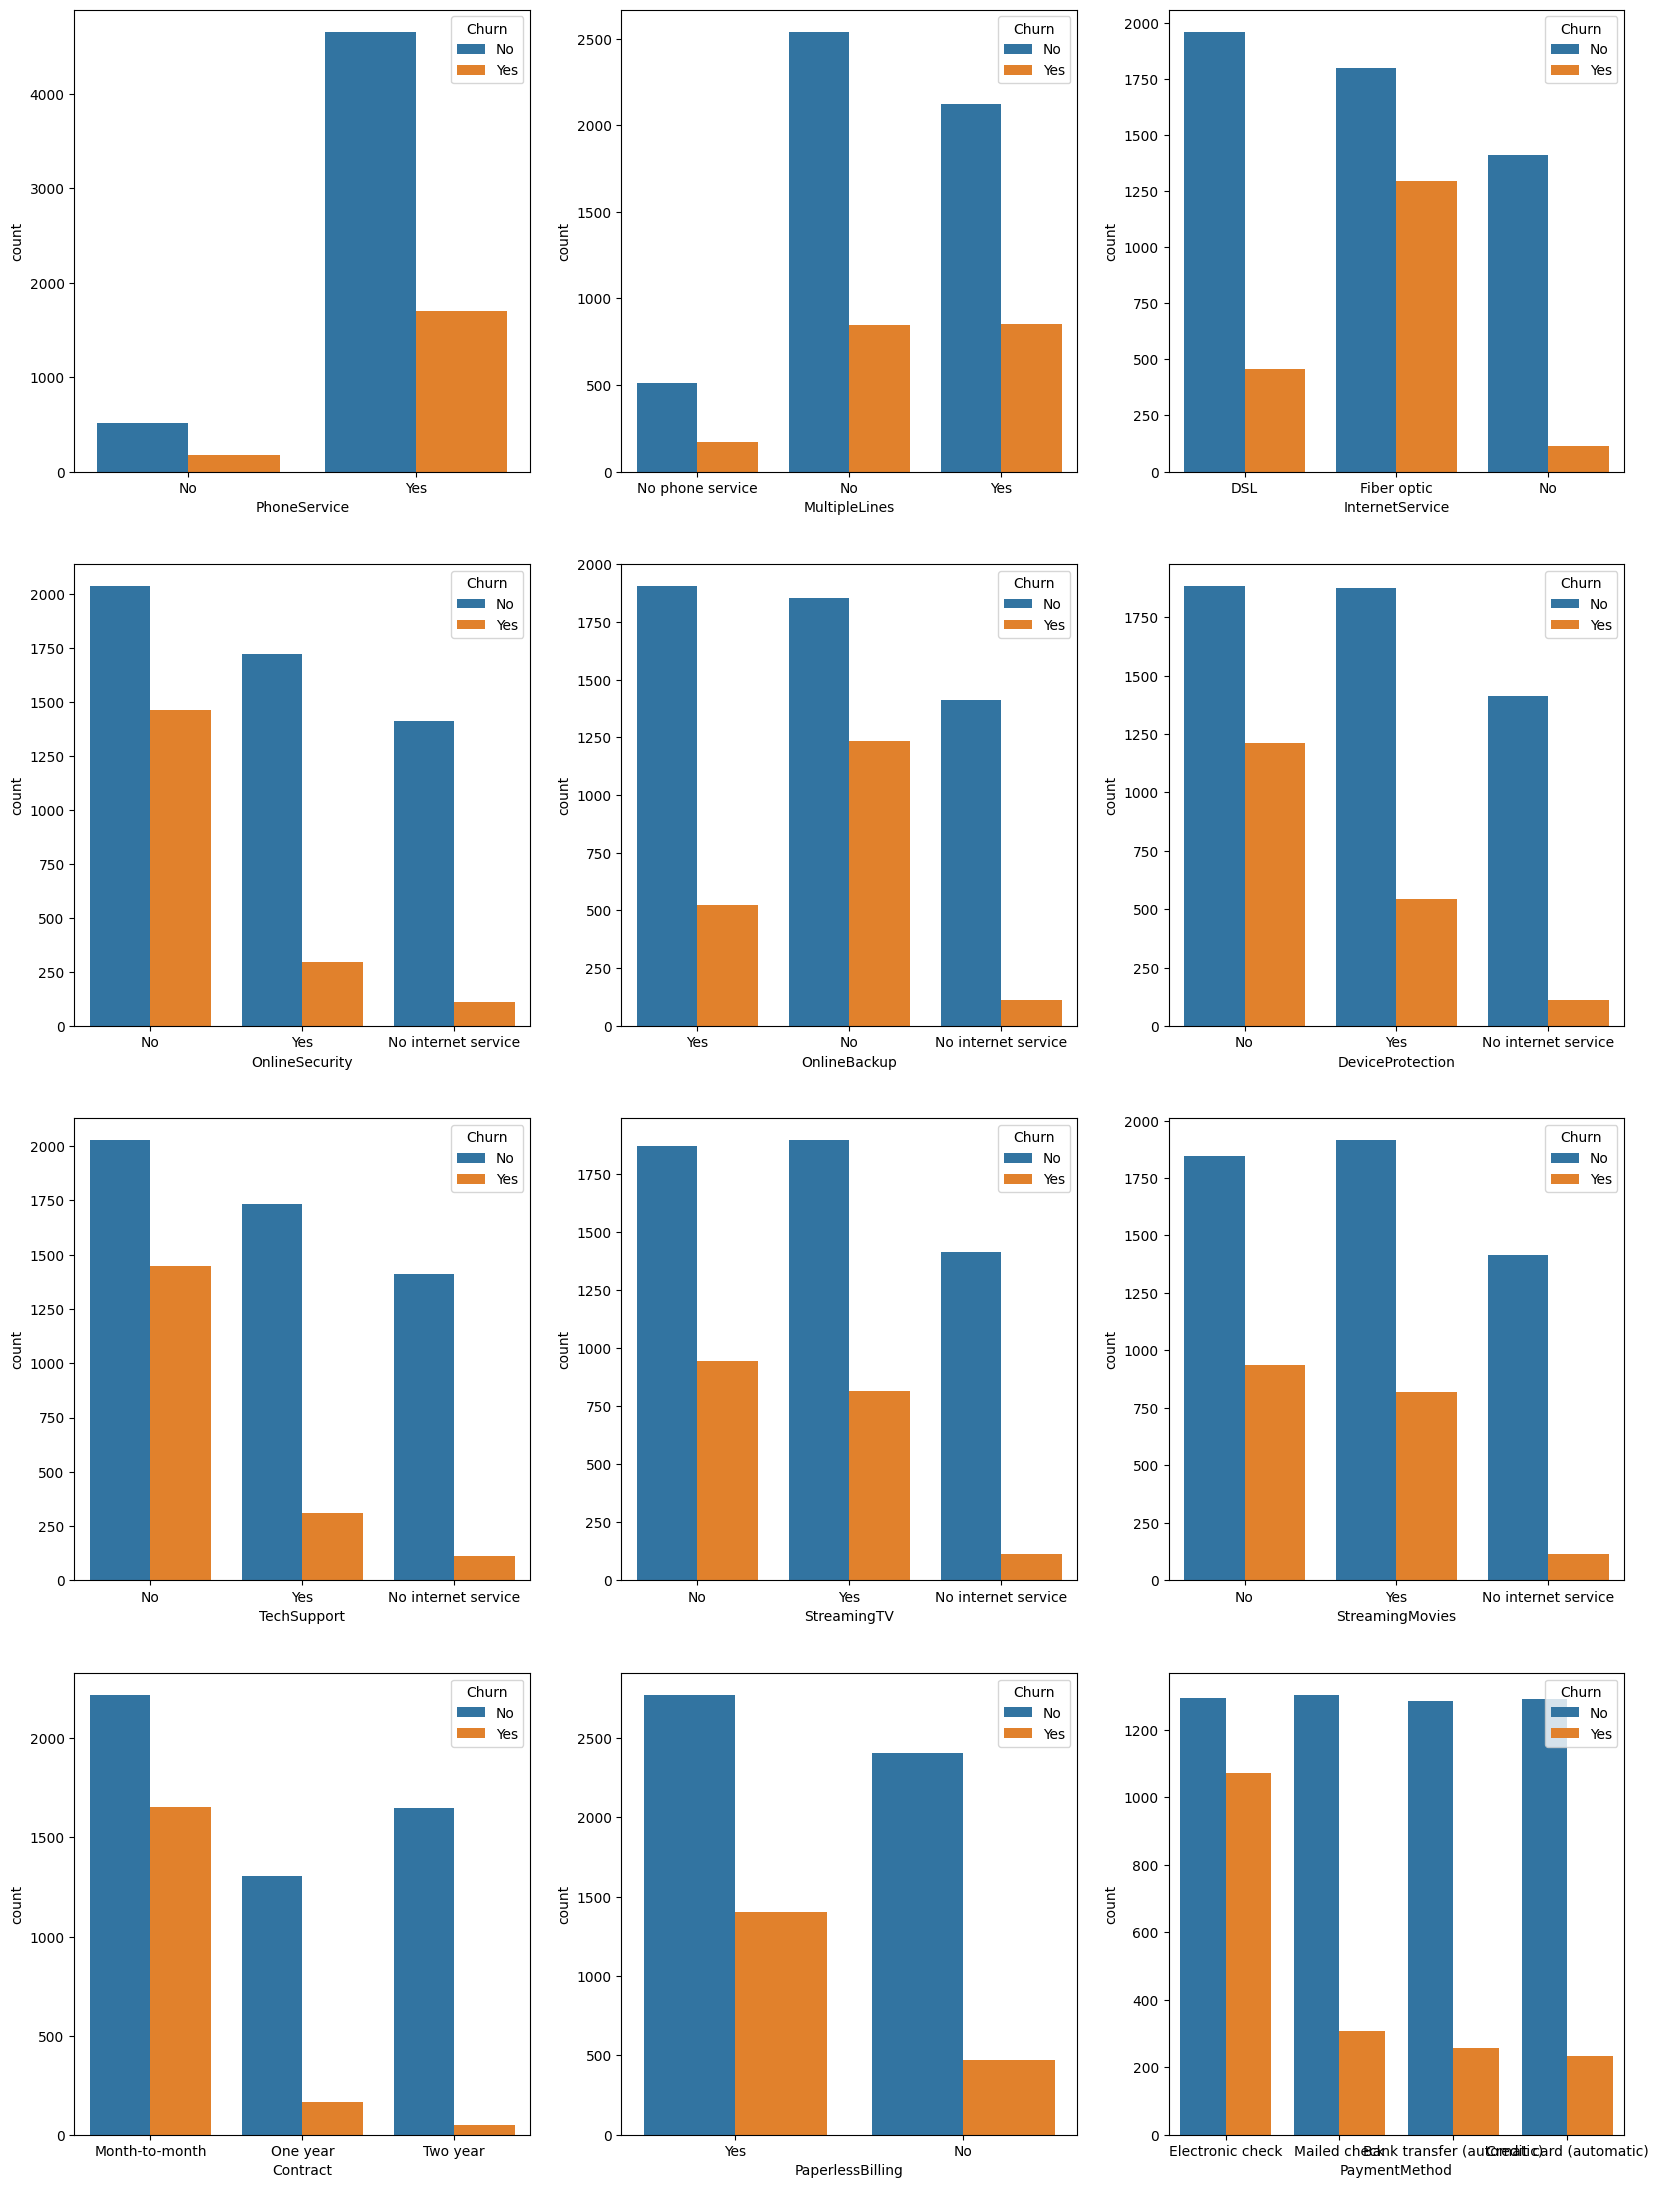

In [25]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

## Churn w.r.t. to Phone lines, Internet Connection and other services.

In [26]:
(pd.crosstab(df.MultipleLines,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
MultipleLines,,
No,74.96,25.04
No phone service,75.07,24.93
Yes,71.39,28.61


In [27]:
(pd.crosstab(df.MultipleLines,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
MultipleLines,,
No,49.11,45.43
No phone service,9.90,9.10
Yes,40.99,45.48


In [28]:
(pd.crosstab(df.StreamingTV,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
StreamingTV,,
No,66.48,33.52
No internet service,92.60,7.40
Yes,69.93,30.07


In [29]:
(pd.crosstab(df.StreamingTV,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
StreamingTV,,
No,36.10,50.40
No internet service,27.31,6.05
Yes,36.59,43.55


In [30]:
(pd.crosstab(df.StreamingMovies,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
StreamingMovies,,
No,66.32,33.68
No internet service,92.60,7.40
Yes,70.06,29.94


In [31]:
(pd.crosstab(df.StreamingMovies,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
StreamingMovies,,
No,35.70,50.19
No internet service,27.31,6.05
Yes,36.99,43.77


Observations:<br>1.Churn rate of clients with multiple lines is almost same as clients which don't have multiple lines.
<br>2.Churn rate of customers with Fibre Optic Internet connection is much higher than customers with DSL connection.
<br>3.Customers who have not taken services such as Online security, Online Backup, Device Protection and Tech Support are more likely to churn than the customers who have taken these services.

## Replacing Churn Yes with 1 and No with 0

In [32]:
#Replacing Churn Yes with 1 and No with 0
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)

In [33]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
ratio               float64
dtype: object

## Churn w.r.t. Gender

In [34]:
(pd.crosstab(df.gender,df.Churn, normalize='index')*100).round(2)

Churn,0,1
gender,,
Female,73.08,26.92
Male,73.84,26.16


#### Gender doesn't seem to be specific for Churn.

## Churn w.r.t. Age, Partner and Dependents.

In [35]:
(pd.crosstab(df.SeniorCitizen,df.Churn,normalize='index')*100).round(2)

Churn,0,1
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


In [36]:
(df['SeniorCitizen'].value_counts()/len(df)).round(2)*100

0    84.0
1    16.0
Name: SeniorCitizen, dtype: float64

In [37]:
(pd.crosstab(df.Partner,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Partner,,
No,67.04,32.96
Yes,80.34,19.66


In [38]:
(pd.crosstab(df.Dependents,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Dependents,,
No,68.72,31.28
Yes,84.55,15.45


It is observed that Senior Citizens form only 16% of Total Customers but the Churn rate among Seniors is much higher at 42% as compared to 24% in Non-Senior citizens.<br>
Customers with No Partner are more likely to Churn than customers with Partner.<br>
Customers without any dependents are twice as likely to Churn than customers with dependents.

## Churn w.r.t. Contract type

In [39]:
(pd.crosstab(df.Contract,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


Customers with month-to-month contract are very likely to Churn as much as 42%, whereas Customers with One year and Two year contracts have very less Churn rates.

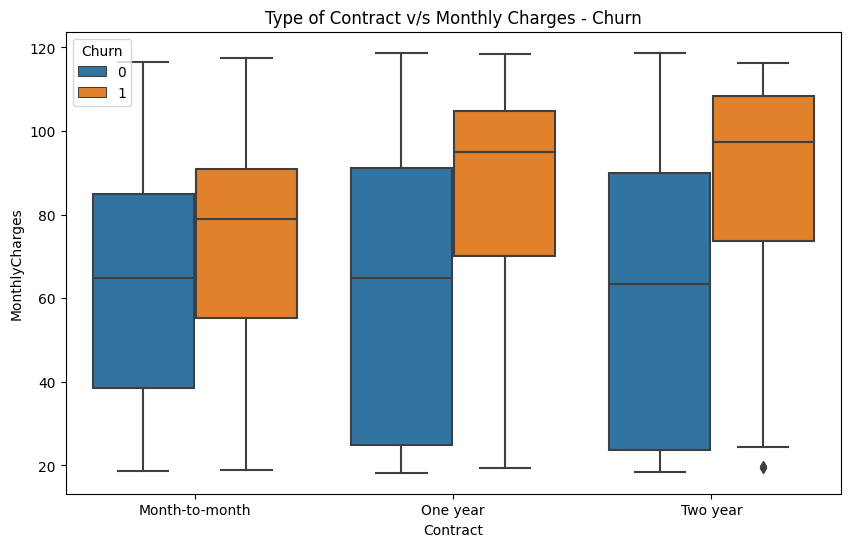

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Contract',y='MonthlyCharges', hue='Churn', data=df)
plt.title('Type of Contract v/s Monthly Charges - Churn')
plt.show()

We can clearly see that in each type of Contract the Customers who decided to exit were paying high monthly charges as compared to others.

# Treating Class Imbalance

In [41]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

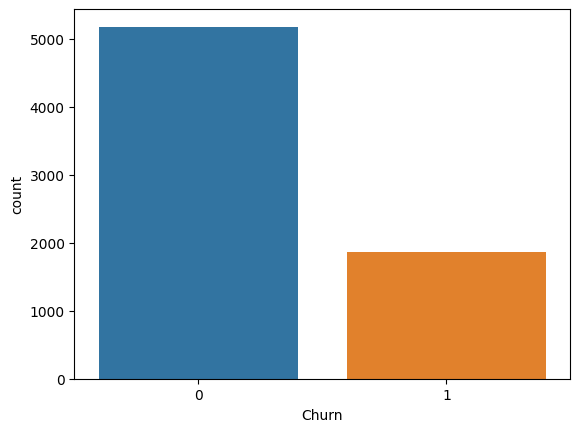

In [42]:
sns.countplot(x='Churn', data=df)

We will do class balancing by undersampling No Churn. 

In [43]:
# Undersample the No Churn data
no_churn = len(df[df['Churn'] == 1])
non_churn_indices = df[df.Churn == 0].index
random_indices = np.random.choice(non_churn_indices,no_churn, replace=False)
churn_indices = df[df.Churn == 1].index
under_sample_indices = np.concatenate([churn_indices,random_indices])
under_sample = df.loc[under_sample_indices]

In [44]:
no_churn

1869

In [45]:
non_churn_indices

Int64Index([   0,    1,    3,    6,    7,    9,   10,   11,   12,   14,
            ...
            7030, 7031, 7033, 7035, 7036, 7037, 7038, 7039, 7040, 7042],
           dtype='int64', length=5174)

In [46]:
random_indices

array([2950, 2771, 5996, ..., 3770, 5452, 5297])

In [47]:
len(random_indices)

1869

In [48]:
len(under_sample_indices)

3738

<Axes: xlabel='Churn', ylabel='count'>

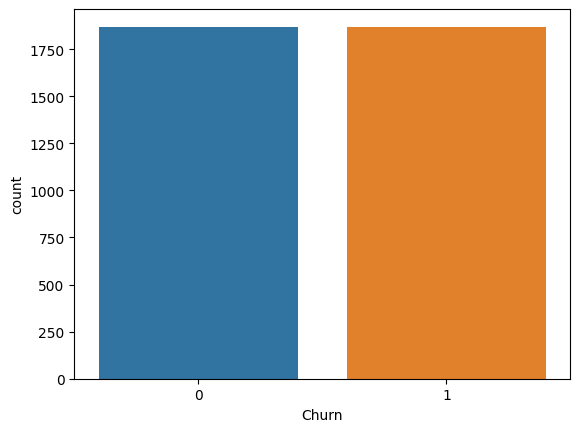

In [49]:
sns.countplot(x='Churn', data=under_sample)

In [50]:
under_sample['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [51]:
under_sample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ratio
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2.008357
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2.144979
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,8.233818
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,29.065363
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,48.566056


In [52]:
under_sample = under_sample.drop(columns=['StreamingMovies','StreamingTV','MultipleLines'],axis=1)

# Encoding Categorical Data

In [53]:
df_encoded = pd.get_dummies(under_sample, columns=['Partner', 'Dependents',
'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [54]:
df_encoded

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ratio,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,Male,0,2,53.85,108.15,1,2.008357,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,9237-HQITU,Female,0,2,70.70,151.65,1,2.144979,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,Female,0,8,99.65,820.50,1,8.233818,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
8,7892-POOKP,Female,0,28,104.80,3046.05,1,29.065363,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
13,0280-XJGEX,Male,0,49,103.70,5036.30,1,48.566056,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,8042-RNLKO,Male,0,66,25.45,1699.15,0,66.764244,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
6119,0080-EMYVY,Female,0,14,51.45,727.85,0,14.146744,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3770,5821-MMEIL,Female,0,57,19.90,1115.60,0,56.060302,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
5452,3026-ATZYV,Female,0,37,75.10,2658.80,0,35.403462,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


# Features and Target

In [55]:
df_encoded.head(1)

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ratio,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,Male,0,2,53.85,108.15,1,2.008357,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [56]:
x = df_encoded.drop(['customerID','gender','ratio','Churn'],axis=1)
y = df_encoded['Churn']

In [57]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,2,53.85,108.15,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# Normalizing the data using MinMax Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [59]:
x_scaled.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.027778,0.353792,0.012453,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.027778,0.521956,0.017462,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.111111,0.810878,0.094475,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Train Test Split

In [60]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
# Instantiating Logistic Regression  
cls = LogisticRegression(random_state=0, max_iter=1000)

In [65]:
# fitting the classifiers
cls.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [66]:
# predict the response from the test dataset
y_valid_pred = cls.predict(x_test)

# Evaluating the model

In [67]:
# To evaluate how a classifier perform
print("Accuracy: ", accuracy_score(y_valid_pred, y_test))
print("Precision: ", precision_score(y_valid_pred, y_test))
print("Recall: ", recall_score(y_valid_pred, y_test))

Accuracy:  0.7647058823529411
Precision:  0.8226950354609929
Recall:  0.7388535031847133


In [68]:
print(classification_report(y_valid_pred, y_test))
print(confusion_matrix(y_valid_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       494
           1       0.82      0.74      0.78       628

    accuracy                           0.76      1122
   macro avg       0.76      0.77      0.76      1122
weighted avg       0.77      0.76      0.77      1122

[[394 100]
 [164 464]]
